# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

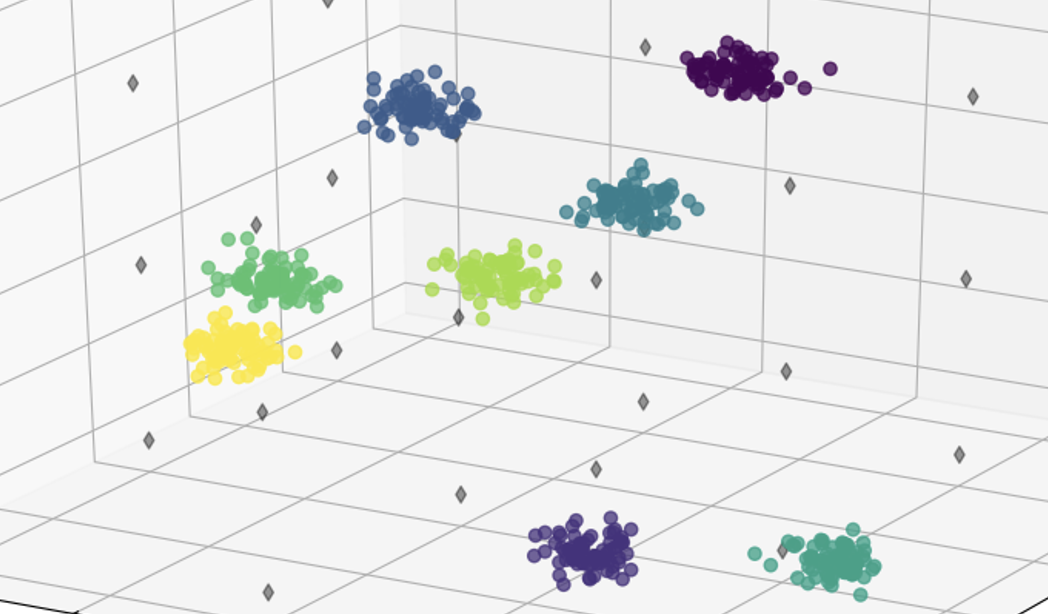

In [59]:
n_samples = 500
np.random.seed(42)

In [60]:
class_1_center = [2, 4]
class_1_data = np.random.normal(loc=class_1_center, scale=0.5, size=(n_samples, 2))

In [61]:
class_2_center = [5, 1]
class_2_data = np.random.normal(loc=class_2_center, scale=0.5, size=(n_samples, 2))

In [62]:
data = np.vstack((class_1_data, class_2_data))
labels = np.array([1] * n_samples + [2] * n_samples)
df = pd.DataFrame(data, columns=['x', 'y'])
df['class'] = labels
csv_file_path = 'synthesized_dataset.csv' 
df.to_csv(csv_file_path, index=False)

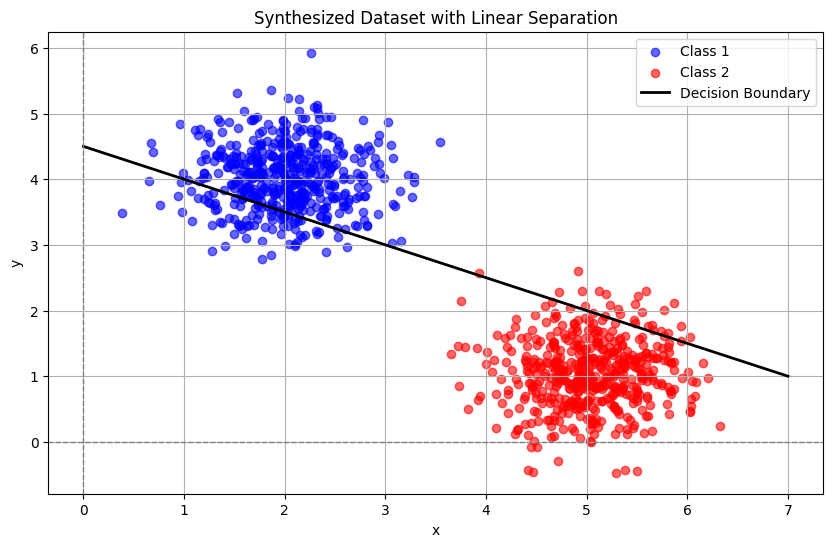

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], label='Class 1', color='blue', alpha=0.6)
plt.scatter(class_2_data[:, 0], class_2_data[:, 1], label='Class 2', color='red', alpha=0.6)

x_values = np.linspace(0, 7, 100)
y_values = -0.5 * x_values + 4.5
plt.plot(x_values, y_values, color='black', linewidth=2, label='Decision Boundary')

plt.title('Synthesized Dataset with Linear Separation')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='grey', lw=1, ls='--')
plt.axvline(0, color='grey', lw=1, ls='--')
plt.legend()
plt.grid()
plt.show()

## Висновок
було успішно синтезовано два класи даних, які представляють собою лінійно роздільні множини. Датасет був створений з використанням гаусового розподілу, де розкид даних визначався матрицею коваріації, а відстань між центроїдами класів була налаштована таким чином, щоб уникнути їх перетинання. Для візуалізації результатів була побудована лінія, отримана за допомогою методу опорних векторів. 

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

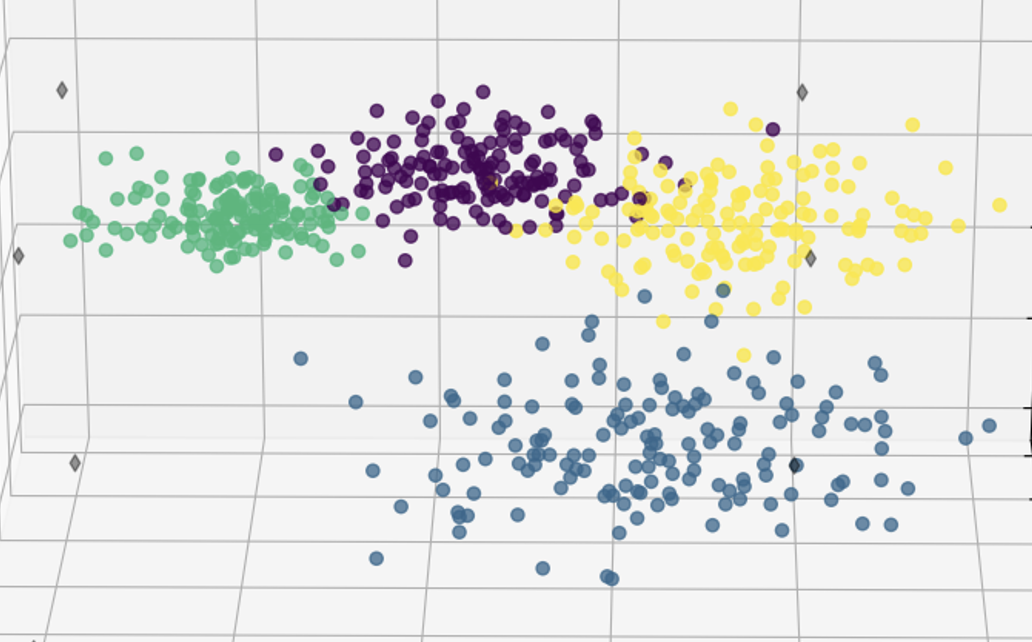

In [64]:
n_samples = 300
np.random.seed(42)


In [65]:
class_1_center = [2, 5]
class_1_data = np.random.normal(loc=class_1_center, scale=0.5, size=(n_samples, 2))

In [66]:
class_2_center = [4, 3]
class_2_data = np.random.normal(loc=class_2_center, scale=0.5, size=(n_samples, 2))

In [67]:
class_3_center = [3, 2]
class_3_data = np.random.normal(loc=class_3_center, scale=0.5, size=(n_samples, 2))

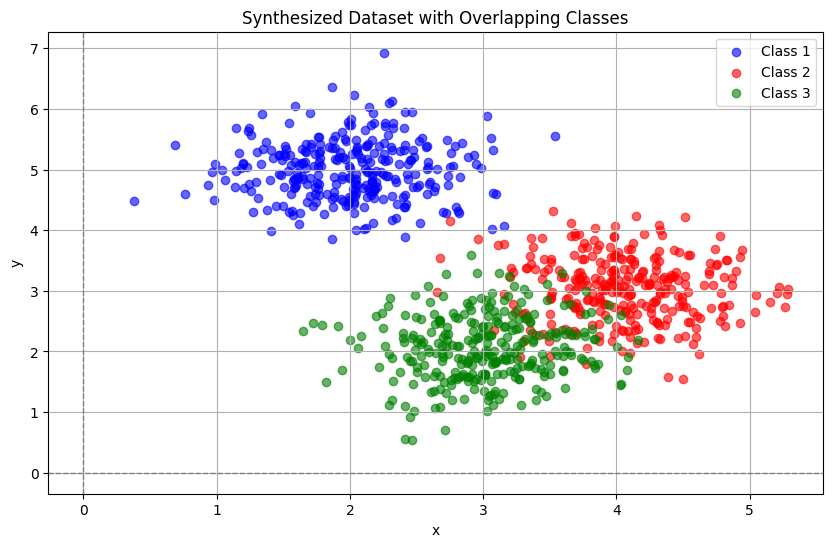

In [68]:
data = np.vstack((class_1_data, class_2_data, class_3_data))
labels = np.array([1] * n_samples + [2] * n_samples + [3] * n_samples)
df = pd.DataFrame(data, columns=['x', 'y'])
df['class'] = labels
csv_file_path = 'synthesized_dataset_with_overlap.csv'
df.to_csv(csv_file_path, index=False)
plt.figure(figsize=(10, 6))
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], label='Class 1', color='blue', alpha=0.6)
plt.scatter(class_2_data[:, 0], class_2_data[:, 1], label='Class 2', color='red', alpha=0.6)
plt.scatter(class_3_data[:, 0], class_3_data[:, 1], label='Class 3', color='green', alpha=0.6)

plt.title('Synthesized Dataset with Overlapping Classes')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='grey', lw=1, ls='--')
plt.axvline(0, color='grey', lw=1, ls='--')
plt.legend()
plt.grid()
plt.show()

Частка точок у зоні перекриття: 0.00


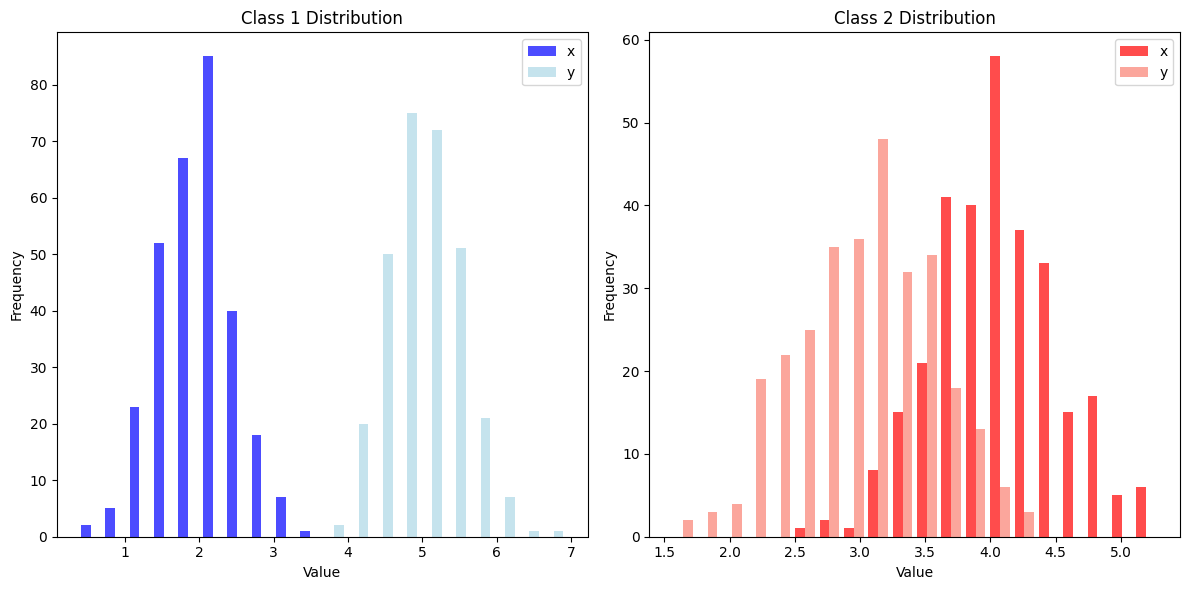

<Figure size 800x600 with 0 Axes>

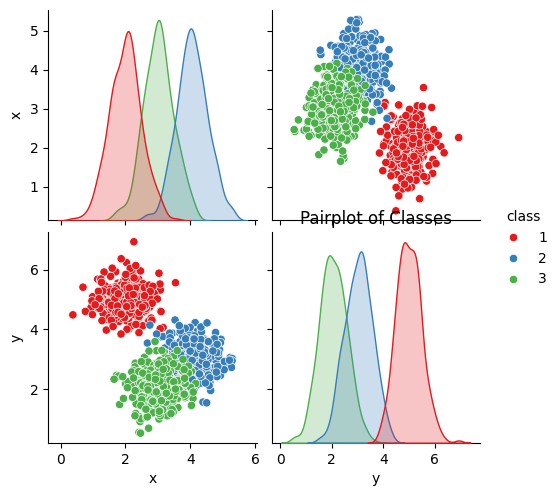

In [69]:
overlap_count = np.sum((class_1_data[:, 0] > 2.5) & (class_1_data[:, 0] < 3.5) & 
                       (class_1_data[:, 1] < 3.5) & (class_1_data[:, 1] > 2.5))

total_points = n_samples * 3 
overlap_fraction = overlap_count / total_points

print(f'Частка точок у зоні перекриття: {overlap_fraction:.2f}')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(class_1_data, bins=20, alpha=0.7, label=['x', 'y'], color=['blue', 'lightblue'])
plt.title('Class 1 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(class_2_data, bins=20, alpha=0.7, label=['x', 'y'], color=['red', 'salmon'])
plt.title('Class 2 Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.pairplot(df, hue='class', palette='Set1')
plt.title('Pairplot of Classes')
plt.show()

## Висновок

Я створив три класи даних, використовуючи гаусовий розподіл. Я налаштував так, щоб класи частково перекривалися. Дані рівномірно розподілені, бо я використовую гаусовий розподіл. Ми вимірюємо, як далеко кожна точка від центроїдів. Якщо точка близька до двох центроїдів, вона потрапляє в зону, де класи перетинаються.

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

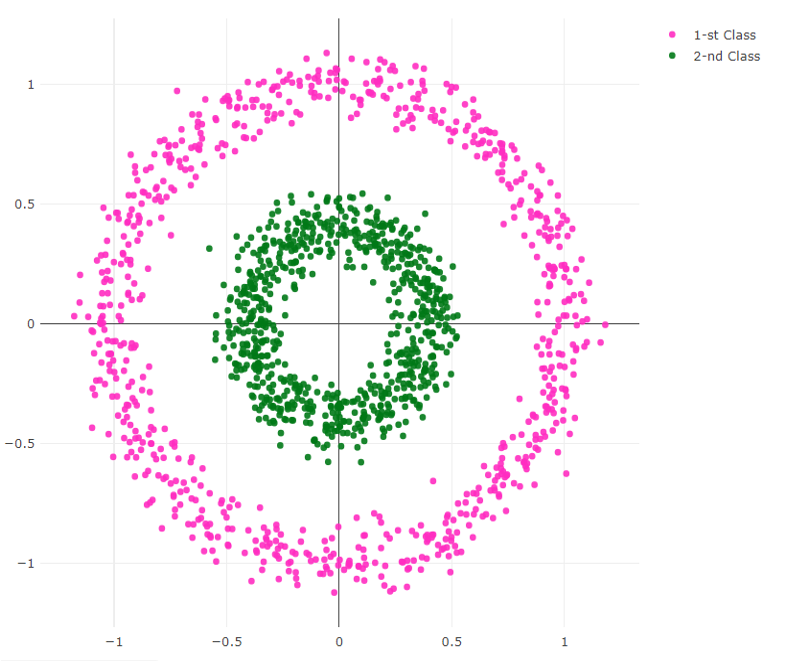

In [70]:
n_samples = 500
np.random.seed(42)

In [71]:
def generate_torus_data(radius, tube_radius, n_samples, noise=0.1):
    theta = np.linspace(0, 2 * np.pi, n_samples)
    phi = np.random.uniform(0, 2 * np.pi, n_samples)
    x = (radius + tube_radius * np.cos(phi)) * np.cos(theta) + np.random.normal(0, noise, n_samples)
    y = (radius + tube_radius * np.cos(phi)) * np.sin(theta) + np.random.normal(0, noise, n_samples)
    
    return x, y

In [72]:
inner_torus_radius = 2
inner_tube_radius = 0.5
x_inner, y_inner = generate_torus_data(inner_torus_radius, inner_tube_radius, n_samples)

In [73]:
outer_torus_radius = 3
outer_tube_radius = 0.8
x_outer, y_outer = generate_torus_data(outer_torus_radius, outer_tube_radius, n_samples)


In [74]:
data = np.vstack((np.column_stack((x_inner, y_inner)), np.column_stack((x_outer, y_outer))))
labels = np.array([1] * n_samples + [2] * n_samples)

In [75]:
df = pd.DataFrame(data, columns=['x', 'y'])
df['class'] = labels

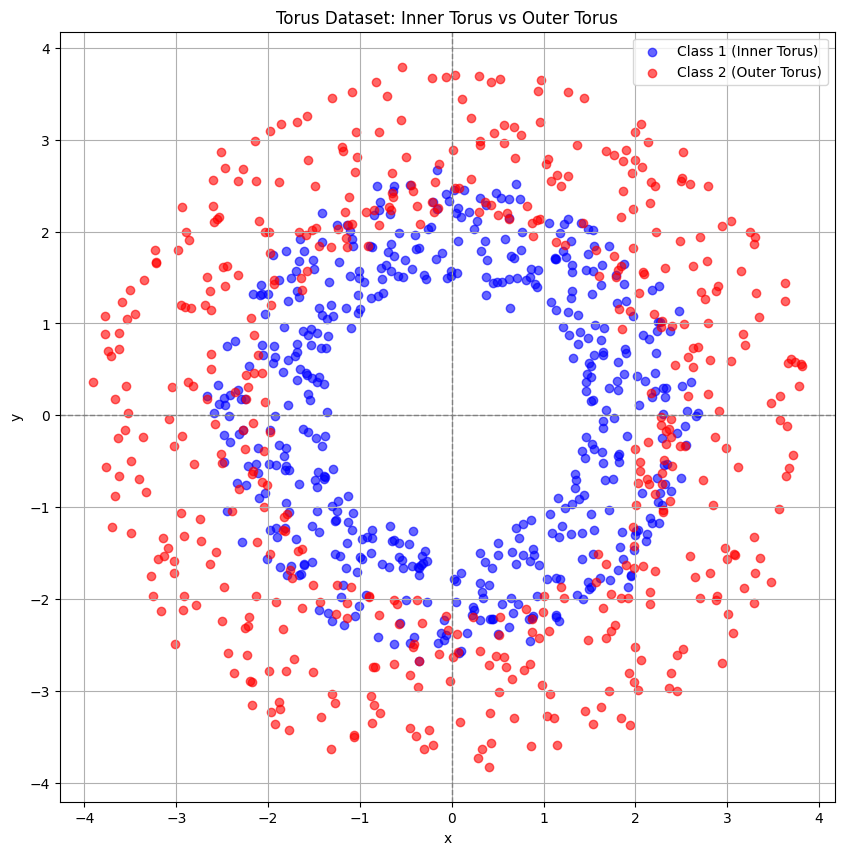

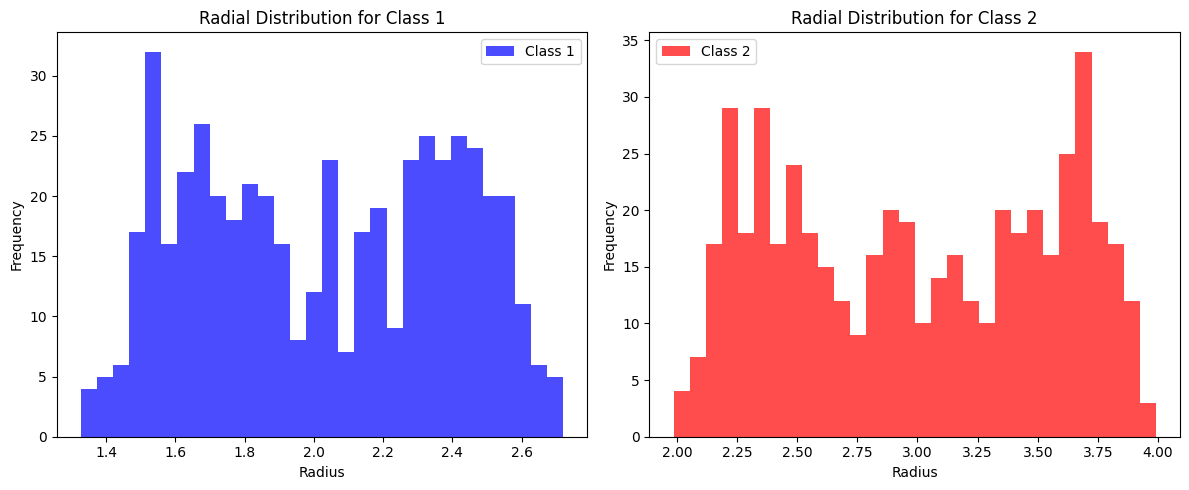

In [76]:
csv_file_path = 'torus_dataset.csv' 
df.to_csv(csv_file_path, index=False)

plt.figure(figsize=(10, 10))
plt.scatter(x_inner, y_inner, label='Class 1 (Inner Torus)', color='blue', alpha=0.6)
plt.scatter(x_outer, y_outer, label='Class 2 (Outer Torus)', color='red', alpha=0.6)
plt.title('Torus Dataset: Inner Torus vs Outer Torus')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='grey', lw=1, ls='--')
plt.axvline(0, color='grey', lw=1, ls='--')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


def plot_radial_histogram(x, y, class_label, ax):
    r = np.sqrt(x**2 + y**2) 
    ax.hist(r, bins=30, alpha=0.7, color='blue' if class_label == 1 else 'red', label=f'Class {class_label}')
    ax.set_title(f'Radial Distribution for Class {class_label}')
    ax.set_xlabel('Radius')
    ax.set_ylabel('Frequency')
    ax.legend()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_radial_histogram(x_inner, y_inner, class_label=1, ax=axes[0])
plot_radial_histogram(x_outer, y_outer, class_label=2, ax=axes[1])
plt.tight_layout()
plt.show()

## Висновок
У коді визначено радіуси та товщину для внутрішнього та зовнішнього торів. З використанням параметричного рівняння і випадкових кутів, точки були рівномірно розподілені вздовж кожного тора. Додавши шум за допомогою np.random.randn, ми отримали більш натуральний вигляд розподілу координат. Спочатку були обчислені азимутальний і полярний кути, після чого згенерували точки, які утворюють два тора. Розподіл класів виявився багатомодальним, що свідчить про наявність кількох груп значень з підвищеною частотою.

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

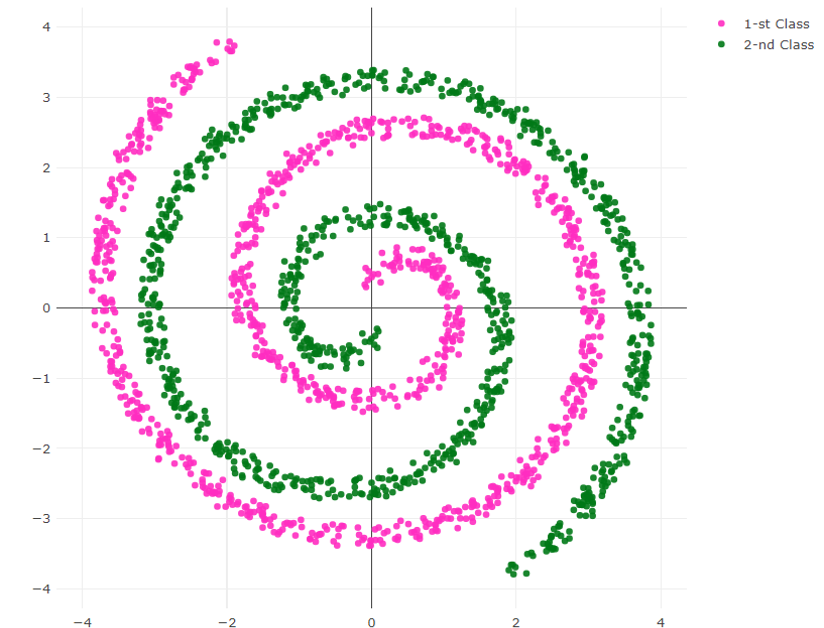

In [77]:
n_samples = 500
np.random.seed(42)

In [78]:
def generate_spiral_data(n_samples, noise=0.1, clockwise=True):

    theta = np.linspace(0, 4 * np.pi, n_samples)  
    r = np.linspace(0, 1, n_samples)
    if clockwise:
        x = r * np.sin(theta) + np.random.normal(0, noise, n_samples)  
        y = r * np.cos(theta) + np.random.normal(0, noise, n_samples)
    else:
        x = r * np.sin(theta) + np.random.normal(0, noise, n_samples)  
        y = -r * np.cos(theta) + np.random.normal(0, noise, n_samples)
    
    return x, y

In [79]:
x_spiral1, y_spiral1 = generate_spiral_data(n_samples, noise=0.05, clockwise=True)

x_spiral2, y_spiral2 = generate_spiral_data(n_samples, noise=0.05, clockwise=False)

data = np.vstack((np.column_stack((x_spiral1, y_spiral1)), np.column_stack((x_spiral2, y_spiral2))))
labels = np.array([1] * n_samples + [2] * n_samples)

In [80]:
df = pd.DataFrame(data, columns=['x', 'y'])
df['class'] = labels

csv_file_path = 'spiral_dataset.csv'  
df.to_csv(csv_file_path, index=False)

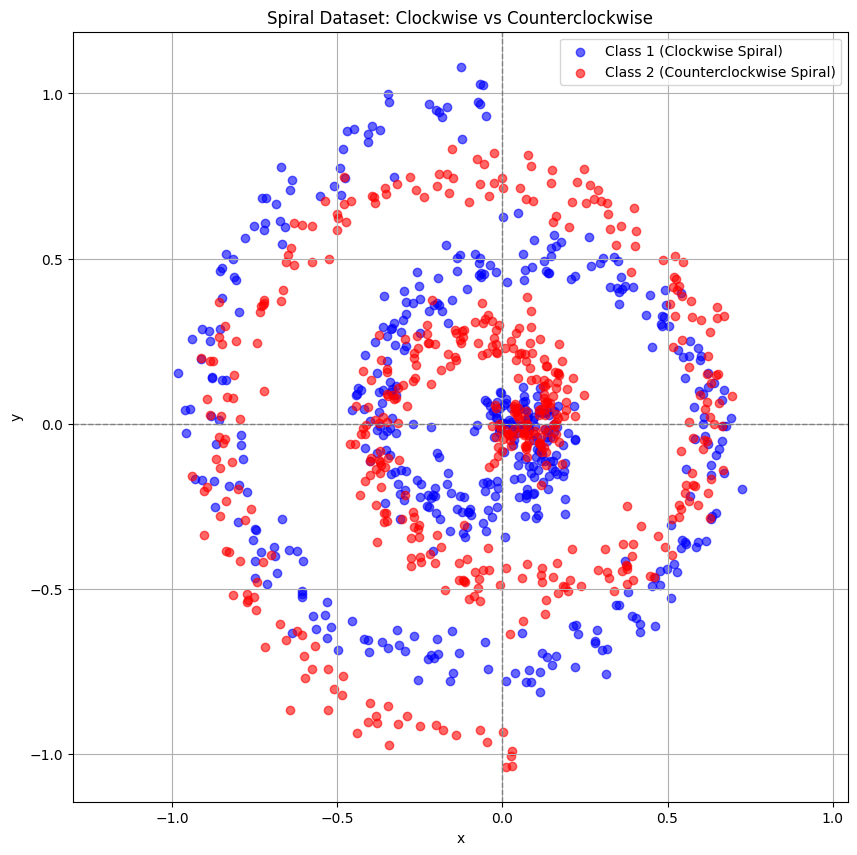

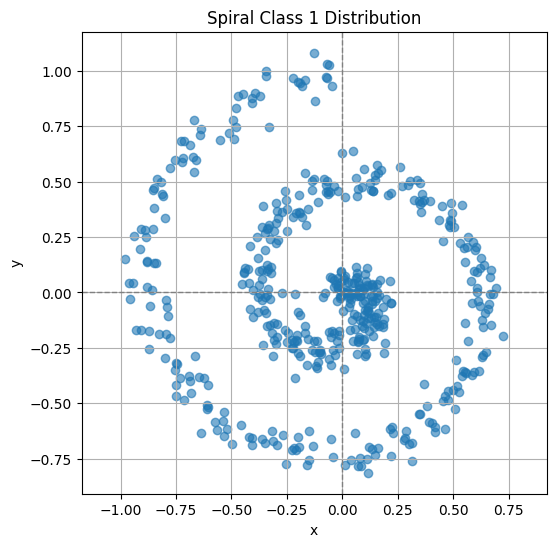

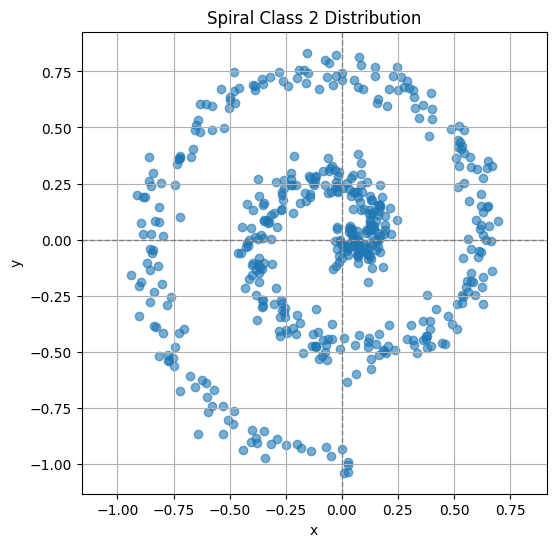

In [81]:
plt.figure(figsize=(10, 10))
plt.scatter(x_spiral1, y_spiral1, label='Class 1 (Clockwise Spiral)', color='blue', alpha=0.6)
plt.scatter(x_spiral2, y_spiral2, label='Class 2 (Counterclockwise Spiral)', color='red', alpha=0.6)
plt.title('Spiral Dataset: Clockwise vs Counterclockwise')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='grey', lw=1, ls='--')
plt.axvline(0, color='grey', lw=1, ls='--')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

def plot_spiral_distribution(x, y, class_label):
    """Побудова графіку для спіралі конкретного класу."""
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, label=f'Class {class_label}', alpha=0.6)
    plt.title(f'Spiral Class {class_label} Distribution')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='grey', lw=1, ls='--')
    plt.axvline(0, color='grey', lw=1, ls='--')
    plt.axis('equal')
    plt.grid()
    plt.show()

plot_spiral_distribution(x_spiral1, y_spiral1, class_label=1)
plot_spiral_distribution(x_spiral2, y_spiral2, class_label=2)

## Висновок
створив дві спіралі з різними напрямками закручування, де кожна точка відповідає своїй мітці. Для забезпечення варіативності використовувались параметри, такі як кількість точок (samples) і рівень шуму (noise). Параметр num_turns визначав кількість витків спіралі, а для створення спіралі з протилежним напрямком до рівняння додавали знак мінус.
Спочатку обчислювали кути для закручування спіралі, де перше значення дорівнювало 1 для відступу з центру, а 4π визначало кількість витків. Далі для обчислення координат використовували косинус для осі x та синус для осі y. Іншу спіраль отримували за допомогою від’ємної тети.

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

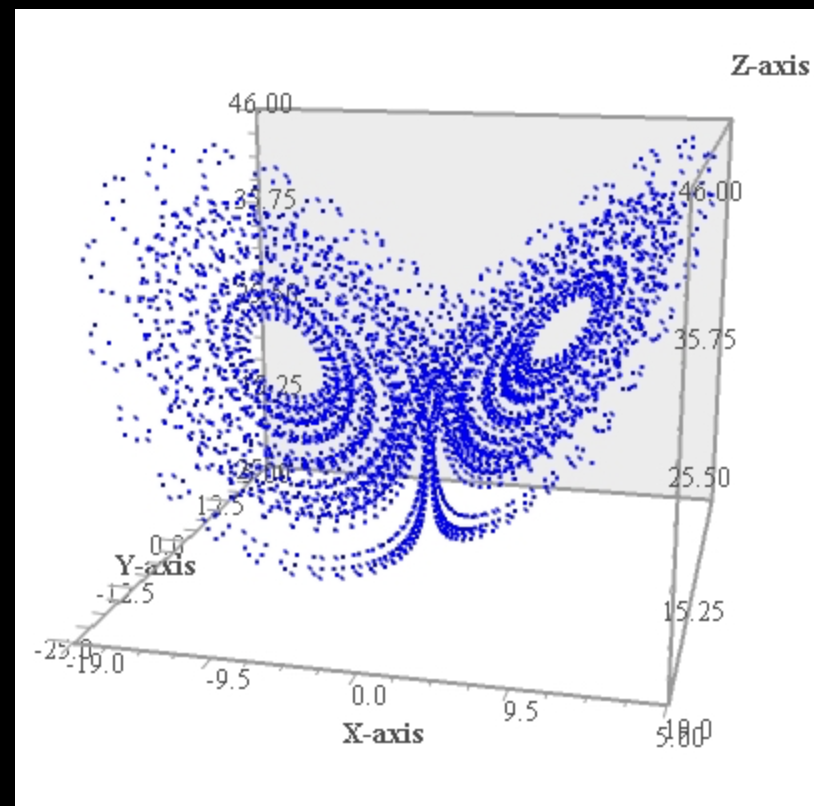

In [82]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def lorenz_system(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return dxdt, dydt, dzdt

In [83]:
def generate_lorenz_trajectory(sigma, rho, beta, initial_state, t):
 
    trajectory = odeint(lorenz_system, initial_state, t, args=(sigma, rho, beta))
    return trajectory

In [84]:
initial_state = [1.0, 1.0, 1.0]  
t = np.linspace(0, 100, 10000)  

params = [
    (10.0, 28.0, 8/3.0), 
    (8.0, 36.0, 3.0),    
    (12.0, 45.0, 5.0)    
]

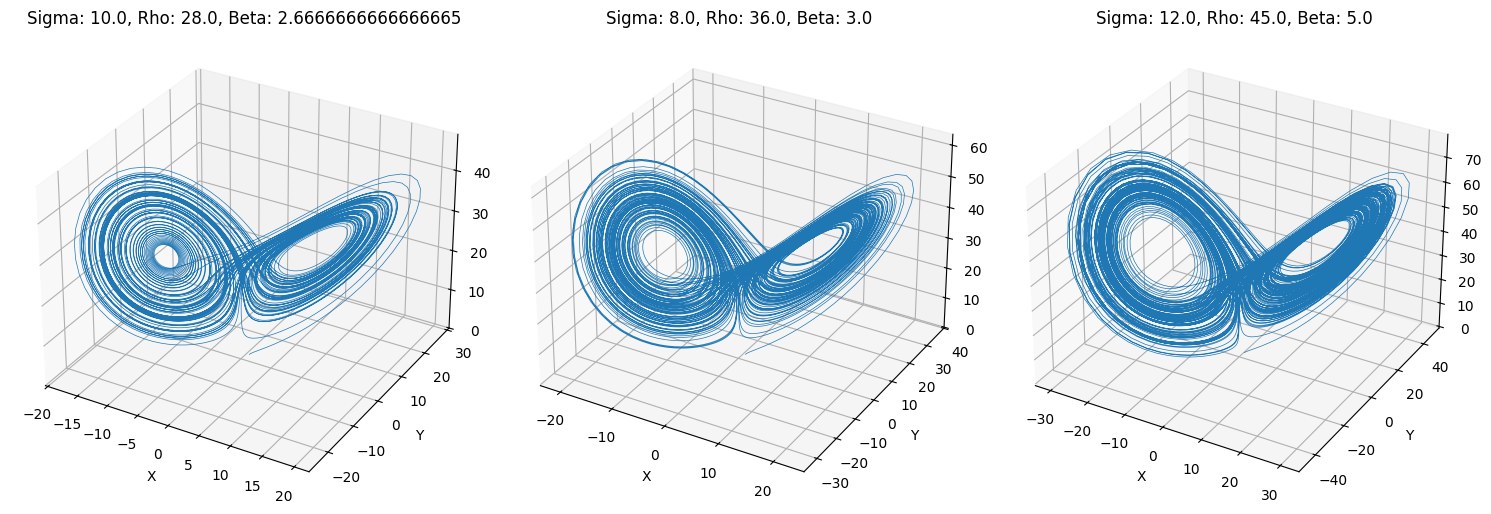

In [ ]:
fig = plt.figure(figsize=(15, 5))

for i, (sigma, rho, beta) in enumerate(params):
    trajectory = generate_lorenz_trajectory(sigma, rho, beta, initial_state, t)
    
    ax = fig.add_subplot(1, len(params), i + 1, projection='3d')
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5)
    ax.set_title(f'Sigma: {sigma}, Rho: {rho}, Beta: {beta}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.grid()

plt.tight_layout()
plt.show()

параметри системи Лоренца мають значний вплив на її динаміку. Зміна σ, ρ та 𝛽 призводить до різних траєкторій і може змінити систему від стабільного стану до хаотичного.